In [1]:
import pm4py

log = pm4py.read_xes("3_extra.xes")

d:\Programs\Programming\Python\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [2]:
log["concept:name"].value_counts()

concept:name
Procfiler/MethodStart_{Roslyn.Utilities.StringTable.LocalIdxFromHash[int32..(int32)]}                                                         2477
Procfiler/MethodEnd_{Roslyn.Utilities.StringTable.LocalIdxFromHash[int32..(int32)]}                                                           2477
Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_CharacterWindowCount[instance.int32..()]}      2458
Procfiler/MethodStart_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_CharacterWindowCount[instance.int32..()]}    2458
Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Syntax.InternalSyntax.SyntaxListBuilder.Clear[instance.void..()]}                                 2451
                                                                                                                                              ... 
Procfiler/MethodEnd_{Roslyn.Utilities.StringTable.AddCore[instance.void..(class.System.String,int32)]}   

In [3]:
import re
import tqdm

names = [ ]
for item in tqdm.tqdm(log["concept:name"].to_numpy()):
    item = re.sub(r'\[(.*)\]', '', item)
    item = re.sub(r'\`(\d*)', '', item)
    item = re.sub(r'[\+\.]\<[^\}]*', '', item)
    item = re.sub(r'\<(.*)\>', '', item)
    names.append(item)

log["concept:name"] = names
log

100%|██████████| 104945/104945 [00:00<00:00, 430757.88it/s]


ManagedThreadId  NativeThreadId  \
0                 25452           25452   
1                 25452           25452   
2                 25452           25452   
3                 25452           25452   
4                 25452           25452   
...                 ...             ...   
104940            18968           18968   
104941            18968           18968   
104942            18968           18968   
104943            18968           18968   
104944            18968           18968   

                                             concept:name  \
0       Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
1       Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Po...   
2       Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
3       Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Po...   
4       Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
...                                                   ...   
104940  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Di...   
104941  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
104942  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Te...   
104943  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
104944  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Di...   

                         time:timestamp        QpcStamp case:concept:name  
0      2025-01-10 23:01:47.312000+00:00  13371928746402                 1  
1      2025-01-10 23:01:47.313000+00:00  13371928760571                 1  
2      2025-01-10 23:01:47.314000+00:00  13371928766301                 1  
3      2025-01-10 23:01:47.314000+00:00  13371928766453                 1  
4      2025-01-10 23:01:47.317000+00:00  13371928798822                 1  
...                                 ...             ...               ...  
104940 2025-01-10 23:03:37.598000+00:00  13373031600192                12  
104941 2025-01-10 23:03:37.599000+00:00  13373031603193                12  
104942 2025-01-10 23:03:37.599000+00:00  13373031603195                12  
104943 2025-01-10 23:03:37.599000+00:00  13373031603221                12  
104944 2025-01-10 23:03:37.599000+00:00  13373031603224                12  

[104945 rows x 6 columns]

In [5]:
import numpy
numpy.unique(log["concept:name"].to_numpy())

array(['Procfiler/MethodEnd_{Microsoft.CodeAnalysis.AssemblyIdentityComparer.get_SimpleNameComparer}',
       'Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.SetFactoryContext}',
       'Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.LanguageParser+ResetPoint..ctor}',
       'Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.LanguageParser.IsCurrentTokenPartialKeywordOfPartialMethodOrType}',
       'Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.LanguageParser.IsCurrentTokenQueryKeywordInQuery}',
       'Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.LanguageParser.IsCurrentTokenWhereOfConstraintClause}',
       'Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.LanguageParser.get_IsInAsync}',
       'Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CSharp.Syntax.InternalSyntax.Lexer.Lex}',
       'Procfiler/MethodEnd_{Microso

In [10]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)

In [11]:
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
heuristics_net = pm4py.discover_heuristics_net(log.copy())

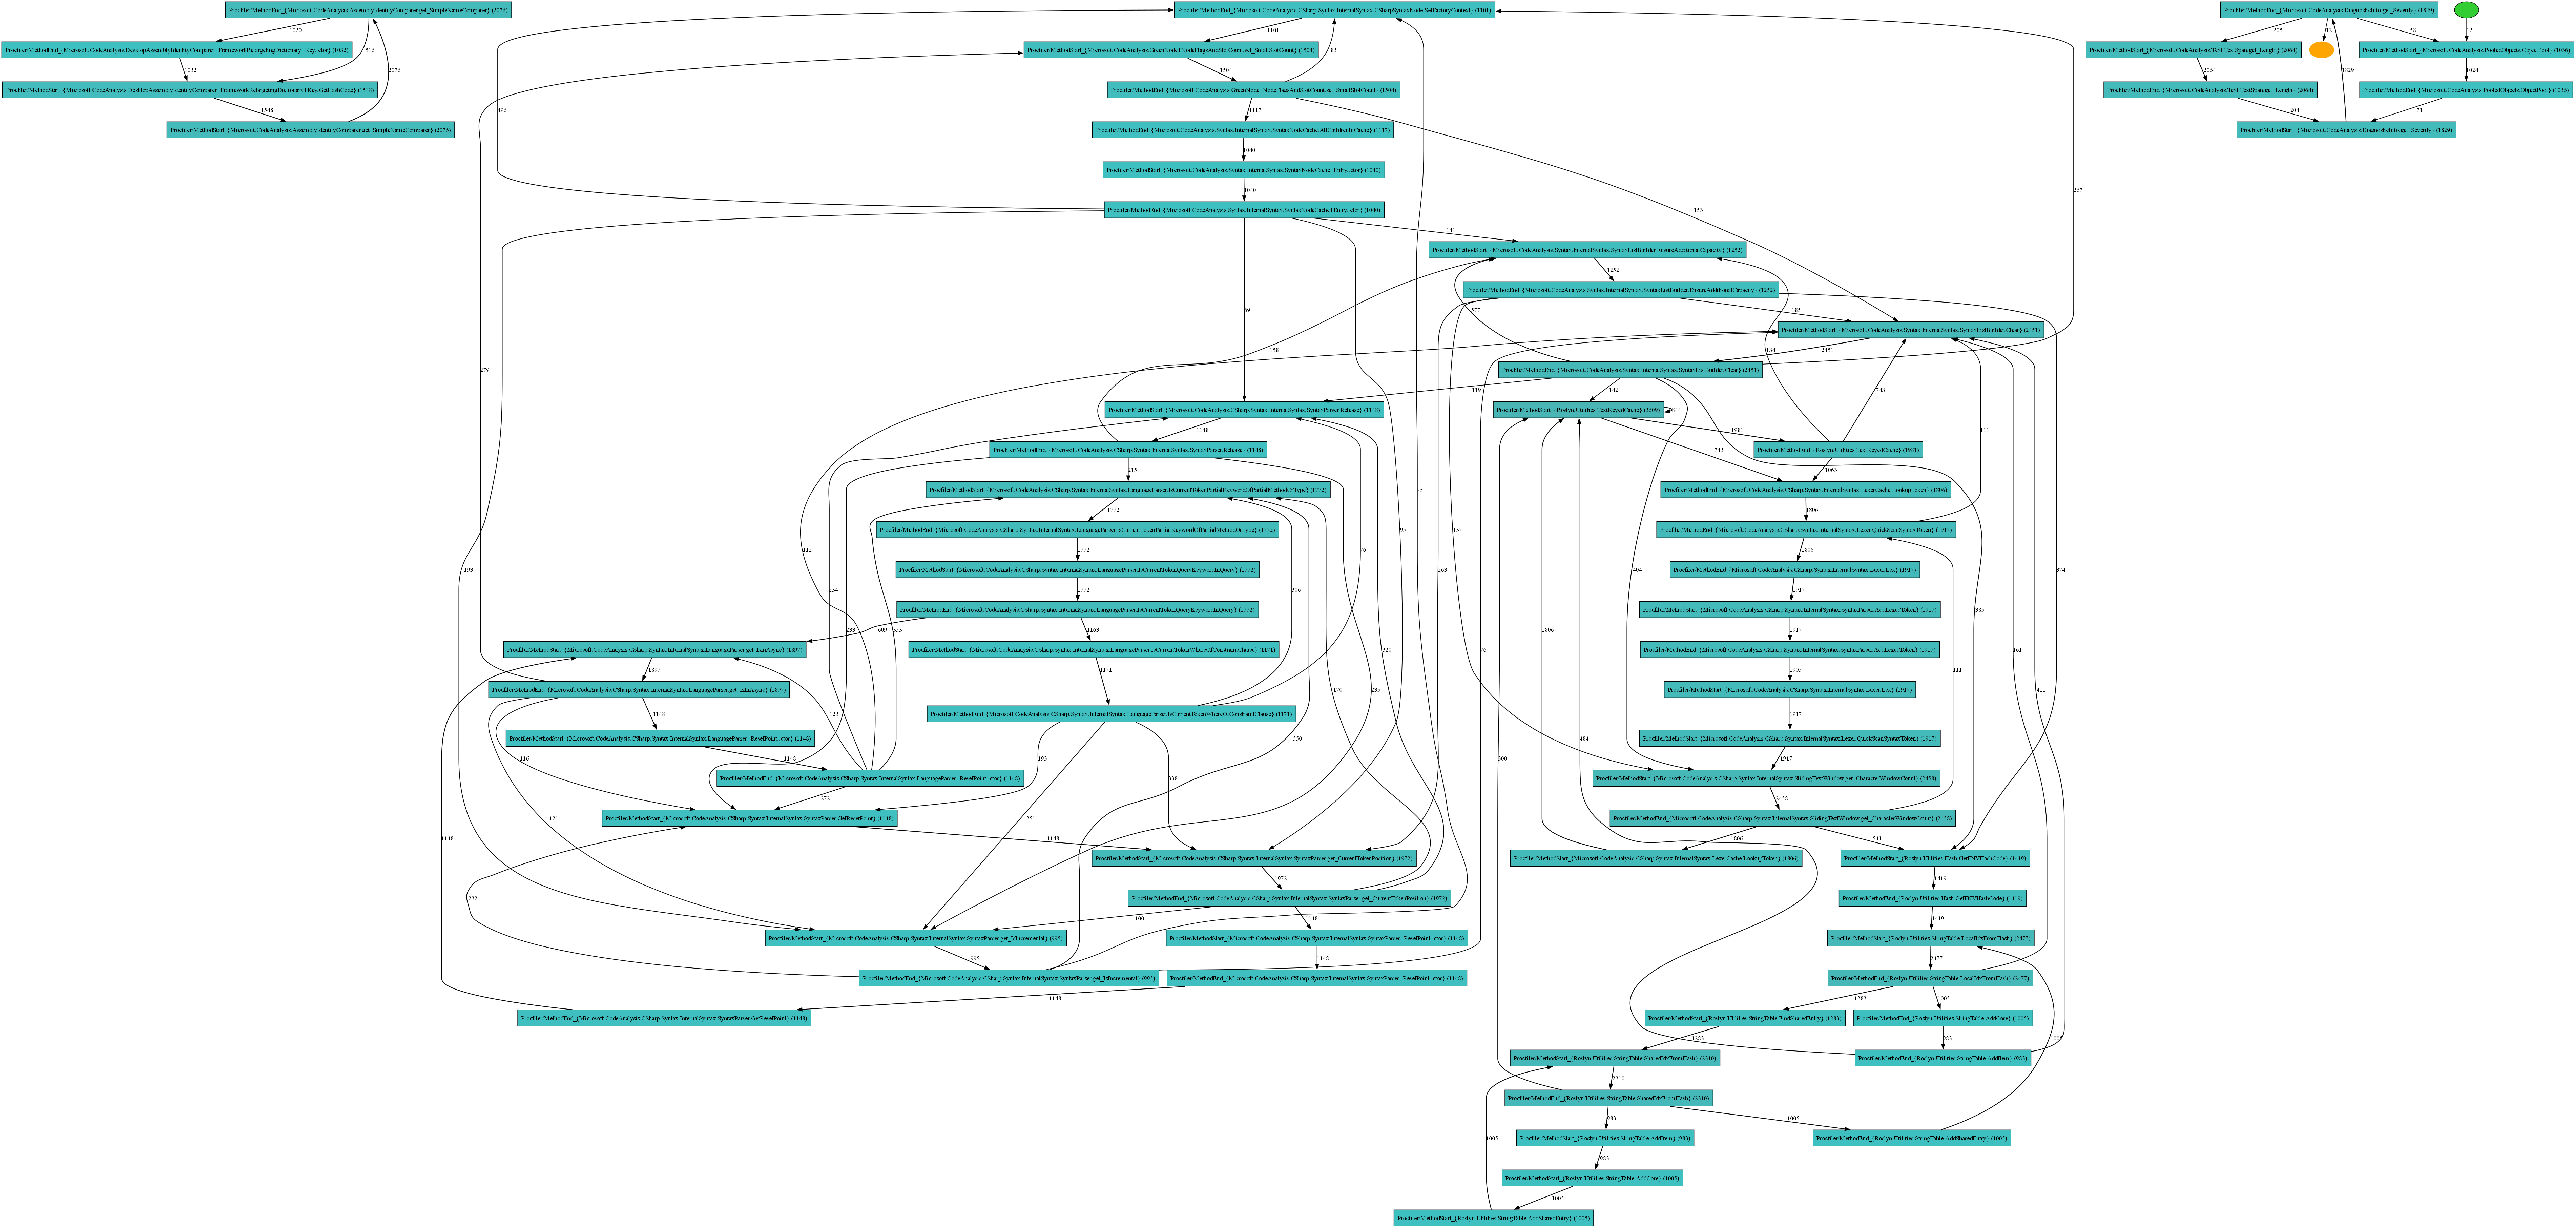

In [9]:
pm4py.view_heuristics_net(heuristics_net)